In [10]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing, Holt

In [13]:
gdp = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day14/gdp-per-capita-ppp-constant-2011.csv")
y_gdp = gdp['GDP per capita']

y_trn_gdp = y_gdp.iloc[:-4]
y_tst_gdp = y_gdp.iloc[-4:]

In [43]:
alpha= 0.15
beta = 1

#linear
ses = Holt(y_trn_gdp)
fit1 = ses.fit(smoothing_level = alpha, smoothing_trend = beta)
fcast1 = fit1.forecast(len(y_tst_gdp))

C:\ProgramData\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


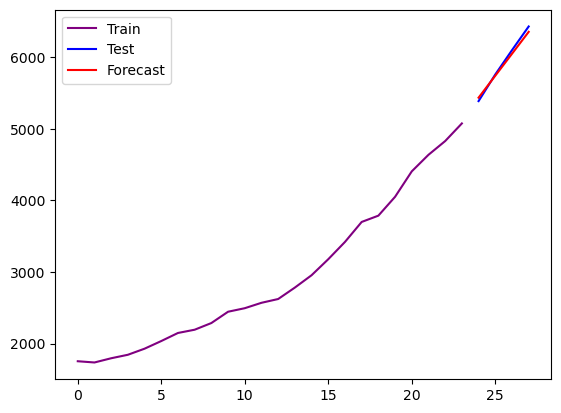

In [44]:
#plot
y_trn_gdp.plot(color='purple', label='Train')
y_tst_gdp.plot(color='blue', label='Test')
fcast1.plot(color='red', label='Forecast')
plt.title("Holts linear trend")
plt.legend(loc='best')
plt.show()

In [45]:
print("RMSE= ", np.sqrt(mean_squared_error(y_tst_gdp, fcast1)))

RMSE=  51.78356848679316


In [46]:
#RMSE=  992.8436615509386,  alpha= 0.5 , beta = 0.02
#RMSE=  187.03954694001627,  alpha= 0.1 , beta = 1
#RMSE=  51.78356848679316,  alpha= 0.15 , beta = 1

In [59]:
#exponential 
ses = Holt(y_trn_gdp, exponential= True)
#for not auto tune
#alpha= 0.1
#beta = 1
#fit1 = ses.fit(smoothing_level = alpha, smoothing_trend = beta)

#for auto tune
fit1 = ses.fit()
fcast1 = fit1.forecast(len(y_tst_gdp))

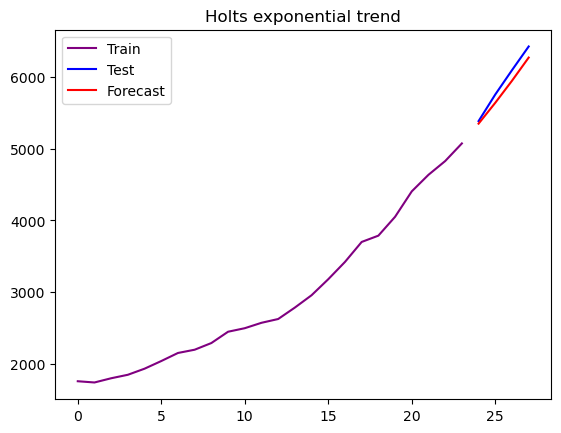

In [60]:
#plot
y_trn_gdp.plot(color='purple', label='Train')
y_tst_gdp.plot(color='blue', label='Test')
fcast1.plot(color='red', label='Forecast')
plt.title("Holts exponential trend")
plt.legend(loc='best')
plt.show()

In [61]:
print("RMSE= ", np.sqrt(mean_squared_error(y_tst_gdp, fcast1)))

RMSE=  122.86827794561775
